**Latihan**  

Gunakan data MPG.  
* pilihkan fitur yang sesuai untuk dibuat model multi linear regression
* pastikan tidak ada multikolinearity.


mpg — Mileage/Miles Per Gallon

cylinders — the power unit of the car where gasoline is turned into power

displacement — engine displacement of the car

horsepower — rate of the engine performance

weight — the weight of a car

acceleration — the acceleration of a car

model — model of the car

origin — the origin of the car

car — the name of the car

### Import library

In [1]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import normaltest

### Dataset

In [41]:
mpg=sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [42]:
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [43]:
mpg[mpg.isnull().any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [44]:
mpg.dropna(subset=['horsepower'], inplace=True)

In [45]:
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

### Data Analysis

In [46]:
mpg[['cylinders','displacement','horsepower']]

,cylinders,displacement,horsepower
0,8,307.0,130.0
1,8,350.0,165.0
2,8,318.0,150.0
3,8,304.0,150.0
4,8,302.0,140.0
...,...,...,...
393,4,140.0,86.0
394,4,97.0,52.0
395,4,135.0,84.0
396,4,120.0,79.0


In [47]:
mpg[['cylinders','displacement','horsepower']].describe()

,cylinders,displacement,horsepower
count,392.000000,392.000000,392.000000
mean,5.471939,194.411990,104.469388
std,1.705783,104.644004,38.491160
min,3.000000,68.000000,46.000000
25%,4.000000,105.000000,75.000000
50%,4.000000,151.000000,93.500000
75%,8.000000,275.750000,126.000000
max,8.000000,455.000000,230.000000


In [48]:
normaltest(mpg['displacement'])

NormaltestResult(statistic=54.99582917696762, pvalue=1.1423716857858833e-12)

In [49]:
mpg[['horsepower','cylinders','displacement']].corr('spearman')['displacement']

horsepower      0.876171
cylinders       0.913566
displacement    1.000000
Name: displacement, dtype: float64

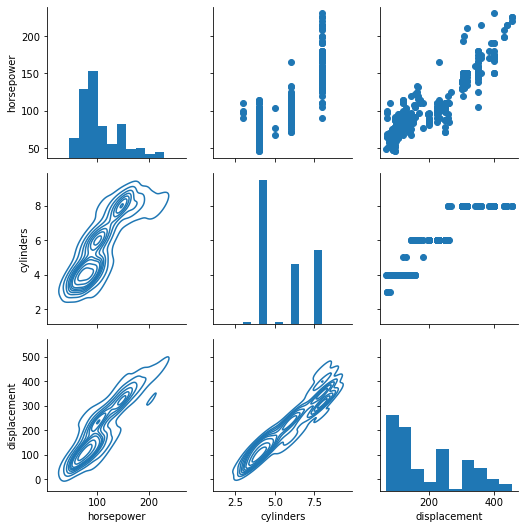

In [50]:
g=sns.PairGrid(mpg[['horsepower','cylinders','displacement']]) #untuk bikin subplot kosong
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
plt.show()

### Model

- Y : displacement
- X : cylinders and horsepower

In [52]:
sm_lm=sm.OLS(mpg['displacement'], sm.add_constant(mpg[['cylinders','horsepower']]))
result=sm_lm.fit()

In [53]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           displacement   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     2832.
Date:                Wed, 30 Jun 2021   Prob (F-statistic):          1.43e-232
Time:                        12:49:32   Log-Likelihood:                -1840.8
No. Observations:                 392   AIC:                             3688.
Df Residuals:                     389   BIC:                             3699.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -125.1087      4.519    -27.685      0.0

In [56]:
result.fittedvalues

0      321.585550
1      353.062803
2      339.572552
3      339.572552
4      330.579051
          ...    
393    117.124782
394     86.546879
395    115.326082
396    110.829332
397    113.527382
Length: 392, dtype: float64

C:\Users\meidi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\meidi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


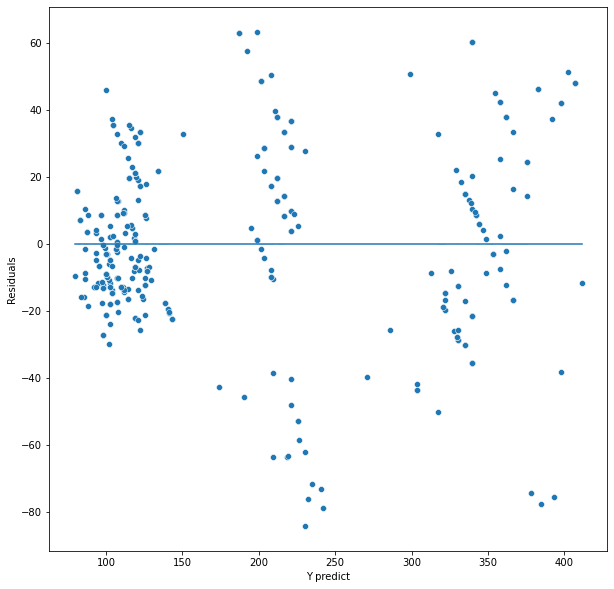

In [57]:
plt.figure(figsize=(10,10))
sns.scatterplot(result.fittedvalues, result.resid)
sns.lineplot(result.fittedvalues, 0)
plt.xlabel('Y predict')
plt.ylabel('Residuals')
plt.show()

In [58]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
def calc_vif(X):
    # calculating vif
    vif=pd.DataFrame()
    vif['variables']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
    return vif

In [62]:
calc_vif(mpg[['cylinders','horsepower']])

,variables,VIF
0,cylinders,28.975837
1,horsepower,28.975837


**SUMMARY**
1. Dari scatterplot, residual model cenderung memiliki distribusi normal
2. Residual model berkumpul di sekitar nilai 0 (rata-rata = 0)
3. Tidak ada pola tertentu (uncorrelated)
4. Varians residual tidak konstan (homoscedascity tidak terpenuhi)
5. nilai VIF cukup tinggi (>4): masuk akal karena memang ada hubungan antara 'size' dan 'total_bill', jadi kita bisa memilih salah satu diantara 'size' dan 'total_bill'